In [10]:
from iav_flap_anomaly_detection import make_data, plot_data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Installation instructions

To create the data set and show the example plots, you need to install

* matplotlib
* numpy
* sklearn

and you're good to go!

# The problem

Below is your data. We have a system that produces data that normally looks like the left picture. However, there is a special kind of problem that occurs that makes the data shift and flip. Usually, nobody has the time to look at the data and label it - we only have data of which we know that it is probably ok and serves as your training data. Can you tell the problematic data apart anyway?

In [11]:
X_train, X_test, test_ground_truth = make_data()

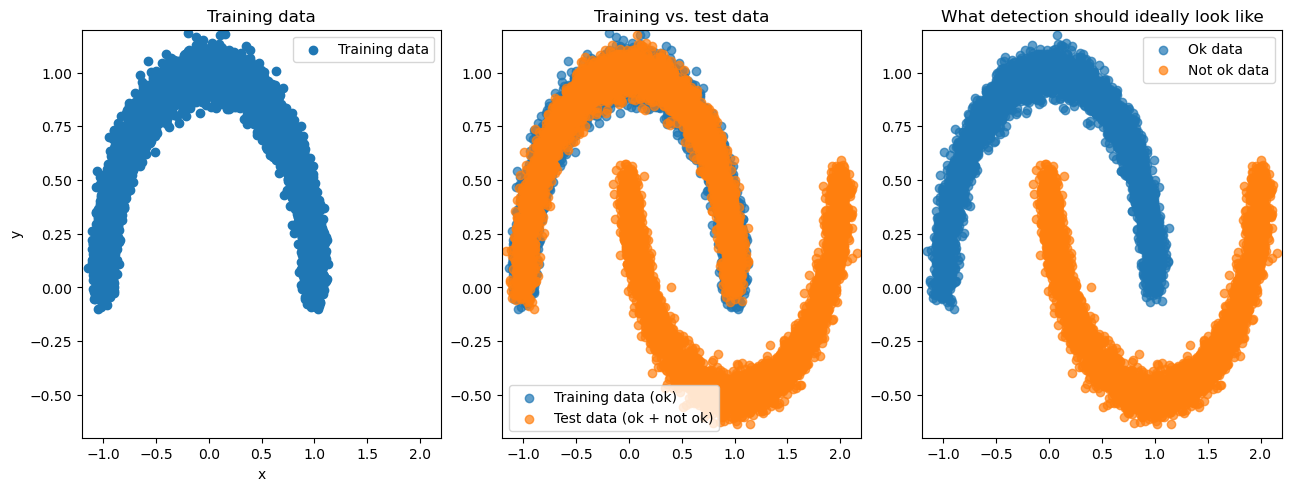

In [12]:
plot_data(X_train, X_test, test_ground_truth)

## Your task

1. Which kind of anomaly detection are you performing?

    1) Supervised
    2) Semi-supervised
    3) Unsupervised

2. Pick a suitable model, for example from scikit-learn (if you know other anomaly detection packages, we're fine with that too)
3. Train it on the training data, and ONLY the training data. Don't cheat by incorporating knowledge about the test set ;-)
4. Try to tell which points of the data are not ok (i.e. don't look like the training data)
5. How good is your model?

## Your solution

Do not hesitate to play around with several different models. Don't worry too much about accuracy - if you're at about 80%, that's fine. We told you the problem is hard ;-) ...

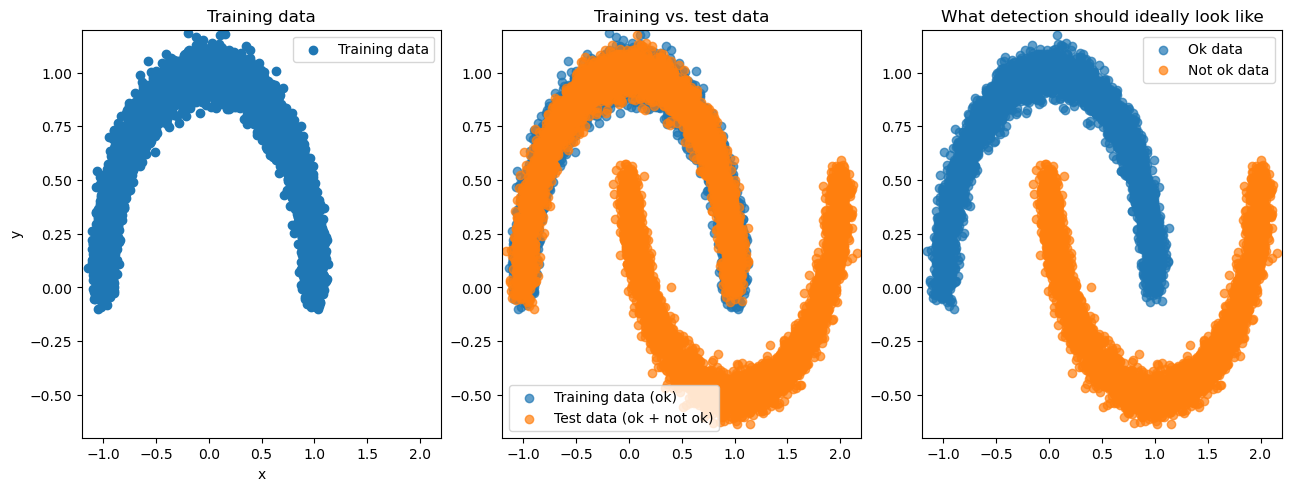

How good is your model?

              precision    recall  f1-score   support

     Anomaly       0.68      1.00      0.81      5000
      Normal       1.00      0.53      0.70      5000

    accuracy                           0.77     10000
   macro avg       0.84      0.77      0.75     10000
weighted avg       0.84      0.77      0.75     10000



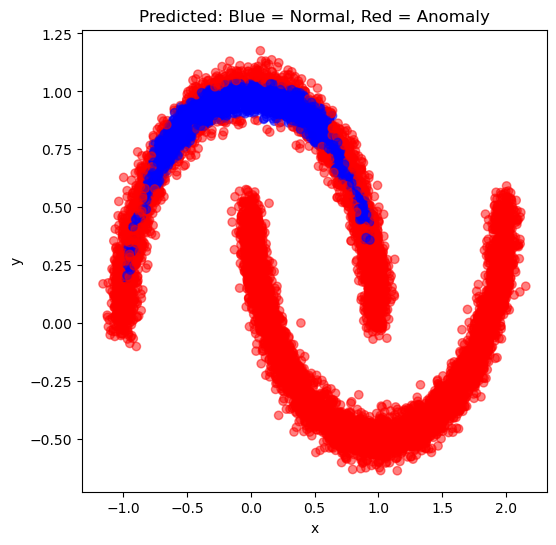

In [4]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Importing data generation and plotting from the provided iav_flap_anomaly_detection.py file
from iav_flap_anomaly_detection import make_data, plot_data

# Step-1: Generating the data
X_train, X_test, test_ground_truth = make_data()

# Step-2: Visualizing the data 
plot_data(X_train, X_test, test_ground_truth)

# Step-3: Preprocessing / Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step-4: Picking a model (Using Isolation Forest first)
model = IsolationForest(contamination="auto", random_state=42)

# Step-5: Training the model only on training data 
model.fit(X_train_scaled)

# Step-6: Predicting anomalies in the test data 
# 1 = normal, -1 = anomaly
y_pred = model.predict(X_test_scaled)

# Step-7: Evaluating the model using the true labels (provided only for evaluation) 
print("How good is your model?\n")
print(classification_report(test_ground_truth, y_pred, target_names=["Anomaly", "Normal"]))

# Step-8: Visualizing the prediction results 
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_test[:, 0], X_test[:, 1], c=np.where(y_pred == 1, 'blue', 'red'), alpha=0.5)
ax.set_title("Predicted: Blue = Normal, Red = Anomaly")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


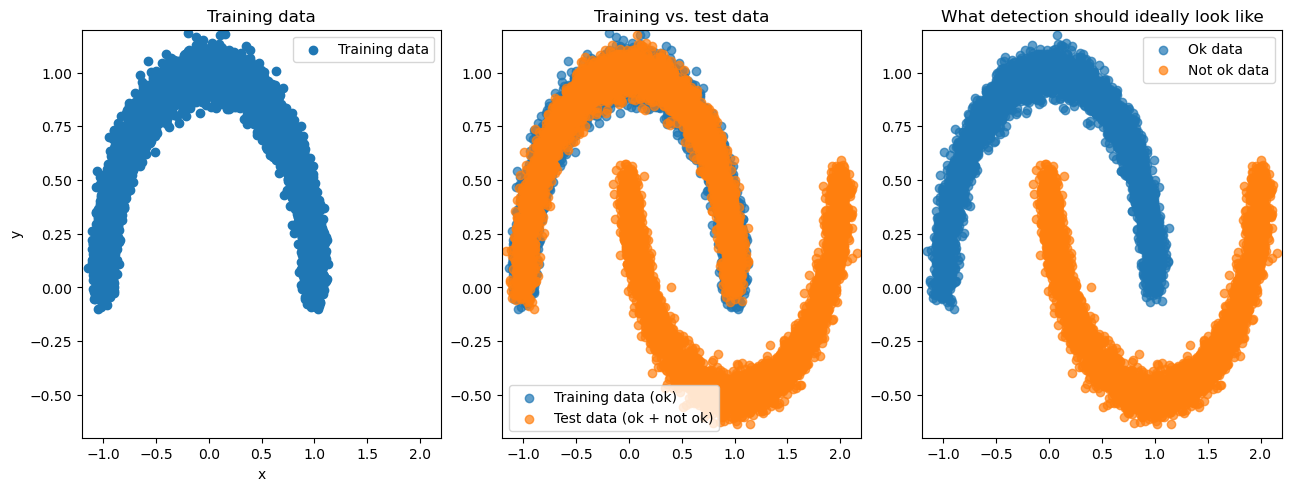

One-Class SVM Results:

              precision    recall  f1-score   support

     Anomaly       0.95      1.00      0.98      5000
      Normal       1.00      0.95      0.98      5000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



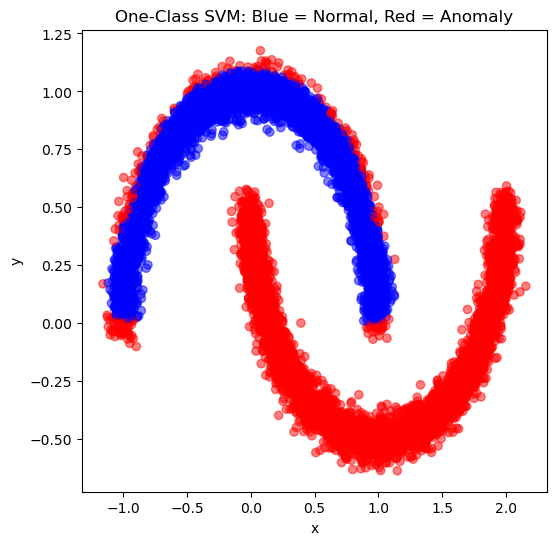

In [3]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Importing data generation and plotting from the provided iav_flap_anomaly_detection.py file
from iav_flap_anomaly_detection import make_data, plot_data

# Step-1: Generating the data
X_train, X_test, test_ground_truth = make_data()

# Step-2: Visualizing the data 
plot_data(X_train, X_test, test_ground_truth)

# Step-3: Preprocessing / Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step-4: Picking a model (Using One-Class SVM model)
# nu = expected proportion of anomalies 
# gamma = kernel coefficient
ocsvm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)

# Step-5: Training the model only on training data 
ocsvm_model.fit(X_train_scaled)

# Step-6: Predicting anomalies in the test data 
# 1 = normal, -1 = anomaly
y_pred = ocsvm_model.predict(X_test_scaled)

# Step-7: Evaluating the model using the true labels (provided only for evaluation)
print("One-Class SVM Results:\n")
print(classification_report(test_ground_truth, y_pred, target_names=["Anomaly", "Normal"]))

# Step-8: Visualizing the prediction results
plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.where(y_pred == 1, 'blue', 'red'), alpha=0.5)
plt.title("One-Class SVM: Blue = Normal, Red = Anomaly")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
